### Background & Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objective
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Data Description
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

### 1.1 Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### 1.2. Import the dataset

In [2]:
new_data  = pd.read_excel('Credit Card Customer Data.xlsx') # Import the dataset named Credit Card Customer Data.xlsx
data = new_data.copy()
data.head()  # view the first 5 rows of the data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### 1.3 Check the Dimension of data

In [3]:
data.shape # Check the shape of the data

(660, 7)

In [4]:
# Check if all Client numbers are unique
data['Customer Key'].nunique()

655

### Observation
- There are 660 rows and 7 columns in this dataset with 655 customers being unique

In [5]:
# We will go ahead and drop this column as we won't be using it
data.drop(['Sl_No'],axis=1,inplace=True)

### 1.4 Check the Information about the data

In [6]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) # Number of missing values in the data

,Number of missing values
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [7]:
data.info() # Check information on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [8]:
data.nunique() # Check the number of Unique values in dataset

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
# Lets see unique values 
colmns = data.columns
for col in colmns:
    print('Unique Values of {} are \n'.format(col),data[col].unique())
    print('*'*90)

Unique Values of Customer Key are 
 [87073 38414 17341 40496 47437 58634 48370 37376 82490 44770 52741 52326
 92503 25084 68517 55196 62617 96463 39137 14309 29794 87241 30507 61061
 24001 68067 65034 14854 81130 29112 13999 32550 82164 61517 28254 30888
 46388 74126 52142 37659 83132 20119 52363 50769 68502 99026 83326 62040
 37252 74625 51182 60301 96386 43886 78503 68419 32828 17937 71632 81566
 29759 36929 70248 91673 61355 60403 85868 76205 66524 69214 21976 35149
 27120 18821 33187 93482 90168 71881 59656 12026 99589 38970 57990 39447
 79694 79403 47296 37559 38165 49198 18007 59619 37016 91099 74704 25742
 11937 52736 88338 18916 92501 96213 26599 73007 97935 26089 14946 74795
 73435 41634 84069 83244 87291 18086 33369 15310 98499 35256 89007 93997
 16577 25440 81116 63663 69811 36111 39454 70199 11602 49697 28701 61627
 34103 14248 31256 45583 52750 95507 23743 53410 53898 66200 58389 61347
 59151 37802 60475 95489 77758 23768 87471 85707 97951 54785 97011 35103
 18564 61009 24

In [10]:
data.describe().T # Five(5) number summary of the quantitative variables

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


In [11]:
# Function to Calculate the Coefficient of Variation
def coef_var(col):
    return round(data[col].std()/data[col].mean() * 100, 3)

for colname in data.columns:
    cf = coef_var(colname)
    print('The coefficient of variation for', colname, 'is :' , cf, '%')

The coefficient of variation for Customer Key is : 46.476 %
The coefficient of variation for Avg_Credit_Limit is : 108.825 %
The coefficient of variation for Total_Credit_Cards is : 46.065 %
The coefficient of variation for Total_visits_bank is : 67.906 %
The coefficient of variation for Total_visits_online is : 112.65 %
The coefficient of variation for Total_calls_made is : 79.962 %


In [12]:
def check_value_counts(col): # Function to check value_counts of variables
    print(data[col].value_counts())
    
for val in data.columns: 
    check_value_counts(val)
    print('-'*35)

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64
-----------------------------------
8000      35
6000      31
9000      28
13000     28
10000     26
19000     26
7000      24
11000     24
18000     23
14000     23
17000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
38000      8
50000      8
56000      7
39000      7
68000      7
52000      6
37000      6
34000      6
30000      6
74000      6
47000      6
48000      6
41000      6
60000      5
29000      5
26000      5
65000      5
31000      5
54000      4
51000      4
59000      4
73000      4
71000      4
49000      4
69000      4
64000      4
66000      4
33000      4
28000      3
67000      3
62000      3
100000     3
72000      3
61000      3
58000      3
44000      3
45000      3
46000      3
57000      3
40000      3
163000     2
84000      2
27000      2
3200

### Observations
- There are 6 numerical variables within this dataset. 


- The mean of 'Avg_Credit_Limit', 'Total_visits_bank', 'Total_visits_online' and 'Total_calls_made' are greater than the median which suggests a right skewed distribution. 


- The coefficient of variation lets us know how spread out values are in relation to the mean. The features, 'Avg_Credit_Limit' and 'Total_visits_online', have coefficient of variations over 100% which suggests the existence of outliers within these variables. To treat these outliers, we will cap the outliers in the lower range at the lower quartile(25%) and also cap the outliers in the upper range at the upper quartile(75%).


- We also observed that there were 5 duplicate customer keys within our dataset. Considering that we should have unique customer keys, this will be further investigated 


- There are no missing values within this dataset

### 1.5 Exploratory Data Analysis (Univariate Analysis)

In [13]:
dup_data = data.groupby('Customer Key').count()

for k in list(dup_data.loc[dup_data.Avg_Credit_Limit >1].index):
    display(data.loc[data['Customer Key'] == k])

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


### Observations

- There are 5 duplicate Customer Key observations within the dataset. This duplicates may have a negative effect on our clusters. We will go ahead and drop the duplicates.

In [14]:
# Drop duplicated rows
data.drop_duplicates(subset=['Customer Key'], inplace=True)

# Check if all Client numbers are unique
print('There are {} unique values in this dataset \n'.format(data['Customer Key'].nunique()))

# We will go ahead and drop this column as we won't be using it
data.drop(['Customer Key'],axis=1,inplace=True)

data.head()

There are 655 unique values in this dataset 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [15]:
# Function to create Histogram and Boxplot Visualizations
def hist_box(variable, bins, xlabel):
    plt.figure(figsize=(6,3)) # set the figure size
    sns.distplot(variable, bins=bins) # Plot the histogram

    plt.axvline(variable.mean(),color='green',label='Mean') # Draw lines on the plot for mean and median of the variable
    plt.axvline(variable.median(),color='blue',label='Median')

    plt.xlabel(xlabel) # label the x-axis
    plt.ylabel('Frequency') # label the y-axis
    plt.legend() # Plot the legend
    plt.title('Measure of Central Tendency and Dispersion') # Display plot title
    plt.show() # Display Plot
    
    plt.figure(figsize=(6,3)) # set the figure size
    sns.boxplot(variable) # Plot BoxPlot

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Avg_Credit_Limit)

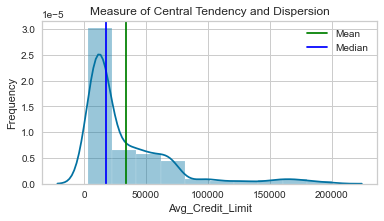

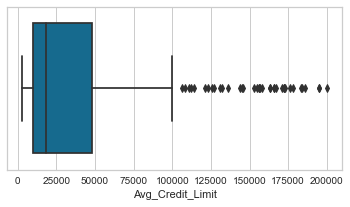

In [16]:
hist_box(data['Avg_Credit_Limit'], 10, 'Avg_Credit_Limit')

### Observations

- From the data, we can see that there are customers the bank extends large credit limits to resulting in outliers within this variable. 

- The average credit limit given to customers is about 18,000 dollars

- As earlier mentioned, there are outliers within this variable with some customers having a credit limit as high as 200,000 dollars

- Most customers however have credit limits between 10,000 and 48,000 dollars

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_Credit_Cards)

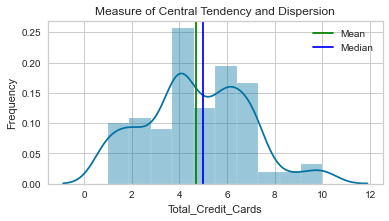

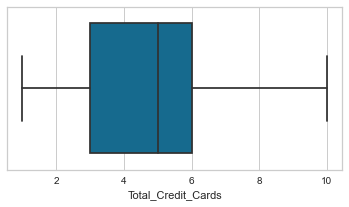

In [17]:
hist_box(data['Total_Credit_Cards'], 10, 'Total_Credit_Cards')

### Observations

- The Total_Credit_Cards feature has a multi-modal distribution which suggests that there may be more than 2 clusters of customers. This will be validated using K-Means and Hierarchical Clustering.

- The average number of credit cards owned by a customer of the bank is 5 credit cards.

- Most customers own between 3 and 6 credit cards.

- There are no outliers within this feature

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_visits_bank)

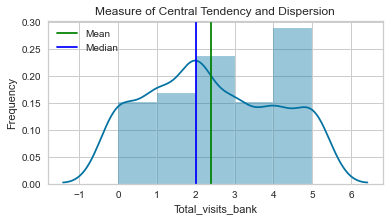

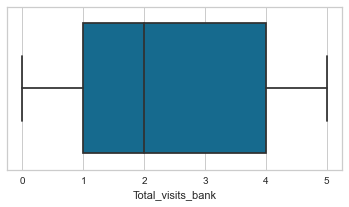

In [18]:
hist_box(data['Total_visits_bank'], 5, 'Total_visits_bank')

### Observations

- The Total_visits_bank feature has a multi-modal distribution which suggests that there may be more than 2 clusters of customers. This will be validated using K-Means and Hierarchical Clustering.

- A customer visits the bank on average 2 times

- Most customers visit the bank between 1 and 4 times

- There are no outliers within this feature

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_visits_online)

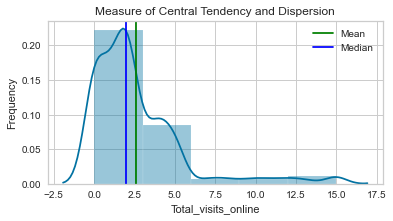

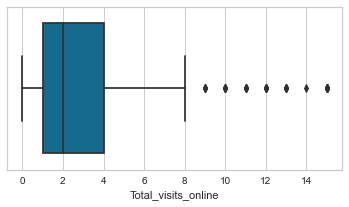

In [19]:
hist_box(data['Total_visits_online'], 5, 'Total_visits_online')

### Observations

- From the data, we can see that there are customers that visit online alot resulting in outliers within this variable. 

- The average number of times a customer visits online is 2

- As earlier mentioned, there are outliers within this variable with some customers visiting online as much as 15 times

- Most customers visit online between 1 and 4 times

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_calls_made)

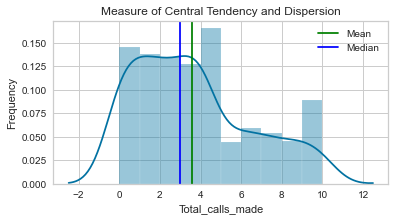

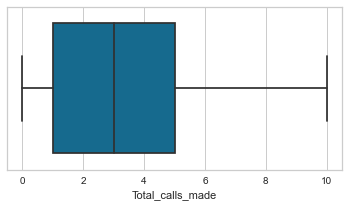

In [20]:
hist_box(data['Total_calls_made'], 10, 'Total_calls_made')

### Observations

- The Total_calls_made feature has a Bi-modal distribution which suggests that there are multiple clusters. This will be validated using K-Means and Hierarchical Clustering.

- A customer calls the bank on average 3 times

- Most customers call the bank between 1 and 5 times

- There are no outliers within this feature

### 1.6 Exploratory Data Analysis (Bivariate Analysis)

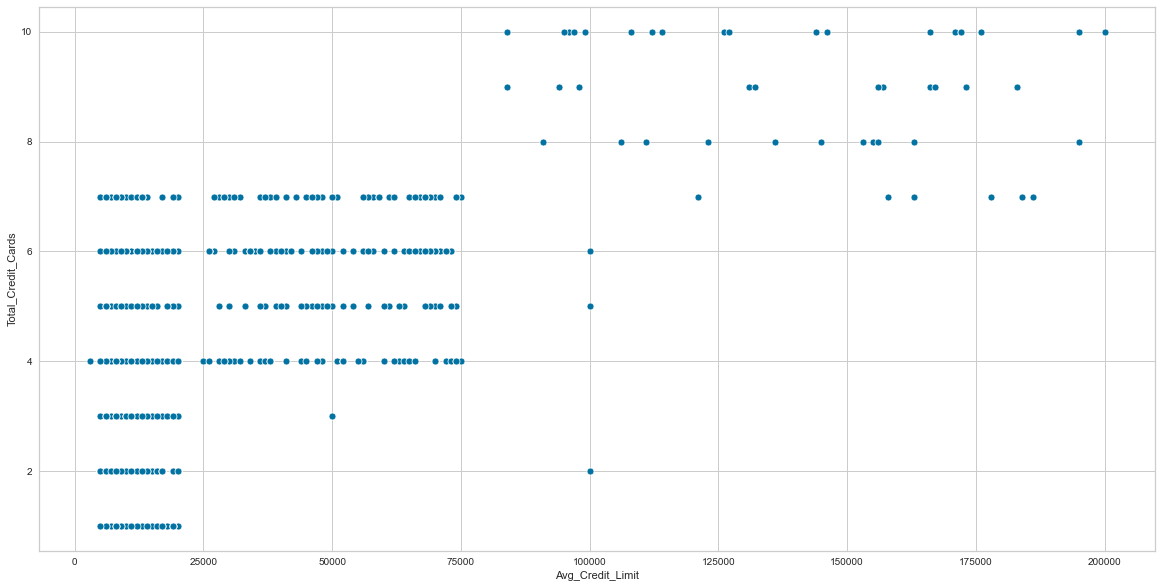

In [21]:
# ScatterPlot of Average Credit Limit and Total Number of Credit Cards Owned
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards', data=data)

In [22]:
# Filter data to reveal outliers
avcr = (data['Avg_Credit_Limit']>25000) & (data['Total_Credit_Cards'] < 4)
data.loc[(avcr)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9


In [23]:
# Filter data to reveal outliers
avcr = (data['Avg_Credit_Limit']>75000) & (data['Total_Credit_Cards'] < 7)
data.loc[(avcr)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
4,100000,6,0,12,3
6,100000,5,0,11,2


### Observations
- Customers that have an average credit limit more than 75,000 also have 7-10 credit cards.
- Customers that have an average credit limit between 25,000 and 75,000 also have 4-7 credit cards.
- Customer that have an average credit limit less than 25,000 have at least 1 credit card to a maximum of 7 credit cards.
- Customers Rows 0,1,4 and 6 are outliers as they do not follow the pattern of similar datapoints. We will go ahead and drop these rows.

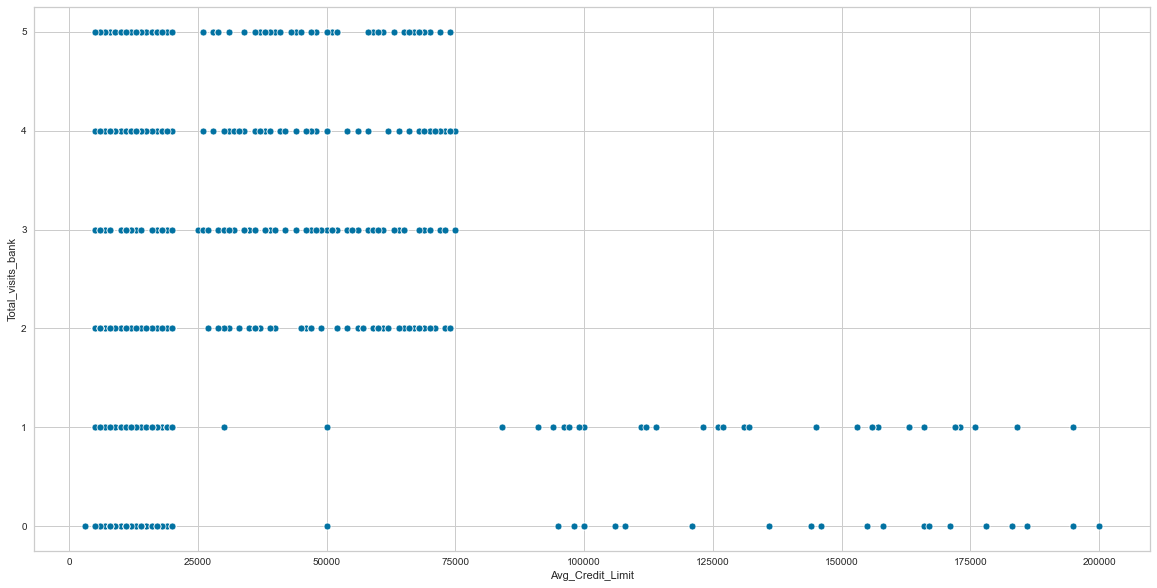

In [24]:
# ScatterPlot of Average Credit Limit and Total Number of Visits to the bank
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_visits_bank', data=data)

In [25]:
# Filter data to reveal outliers
acvb = (data['Avg_Credit_Limit']>25000) & (data['Avg_Credit_Limit']<75000) & (data['Total_visits_bank'] < 2) 
data.loc[(acvb)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4


### Observations
- Customers who have an average credit limit of more than 75,000 do not visit the bank often. (0-1 visit)
- Customers who have an average credit limit between 25,000 and 75,000 visit the bank 2-5 times.
- Customers who have an average credit limit less than 25,000 visited the bank more than other customers.
- Customers in rows 1,2,3 are outliers as they do not follow the pattern of similar datapoints. We will go ahead and drop these rows.

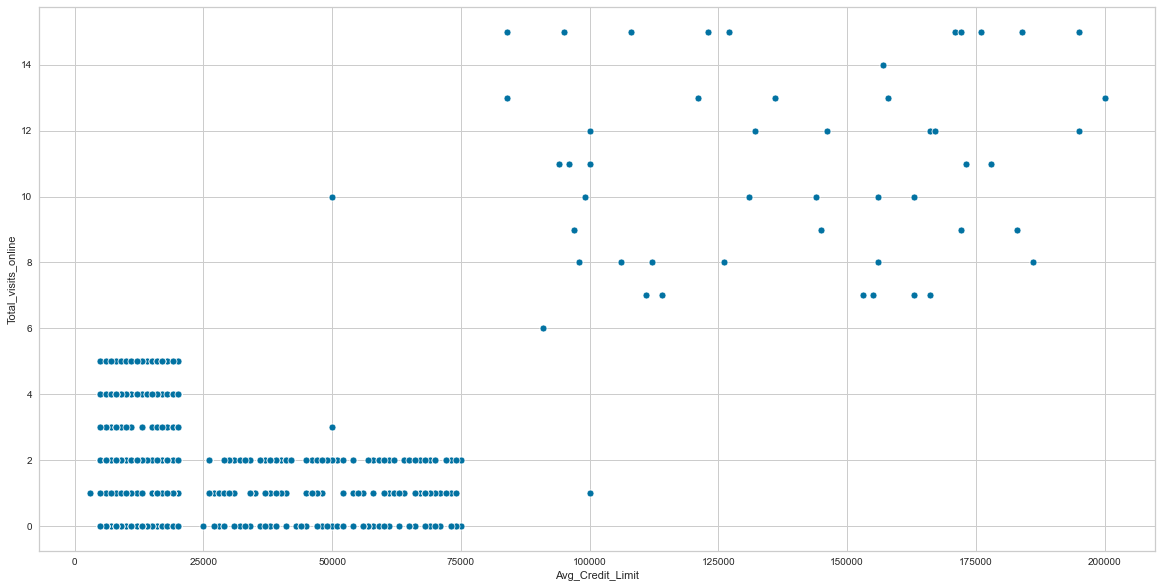

In [26]:
# ScatterPlot of Average Credit Limit and Total Number of Online Visits 
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_visits_online', data=data)

In [27]:
# Filter data to reveal outliers
acvo = (data['Avg_Credit_Limit']>75000) & (data['Total_visits_online'] < 7) 
data.loc[(acvo)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
625,91000,8,1,6,1


In [28]:
# Filter data to reveal outliers
acvo = (data['Avg_Credit_Limit']>25000) & (data['Avg_Credit_Limit']<75000) & (data['Total_visits_online'] >2) 
data.loc[(acvo)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
2,50000,7,1,3,4


### Observation

- Customers who have an average credit limit of more than 75,000 visit the bank online frequently. (6-14 visits)
- Customers who have an average credit limit between 25,000 and 75,000 visited the bank online 2 or lower times.
- Customers who have an average credit limit less than 25,000 visits the bank online beween 0 and 5 times.
- Customers in rows 0,1,2,614 are outliers as they do not follow the pattern of similar datapoints. We will go ahead and drop these rows.

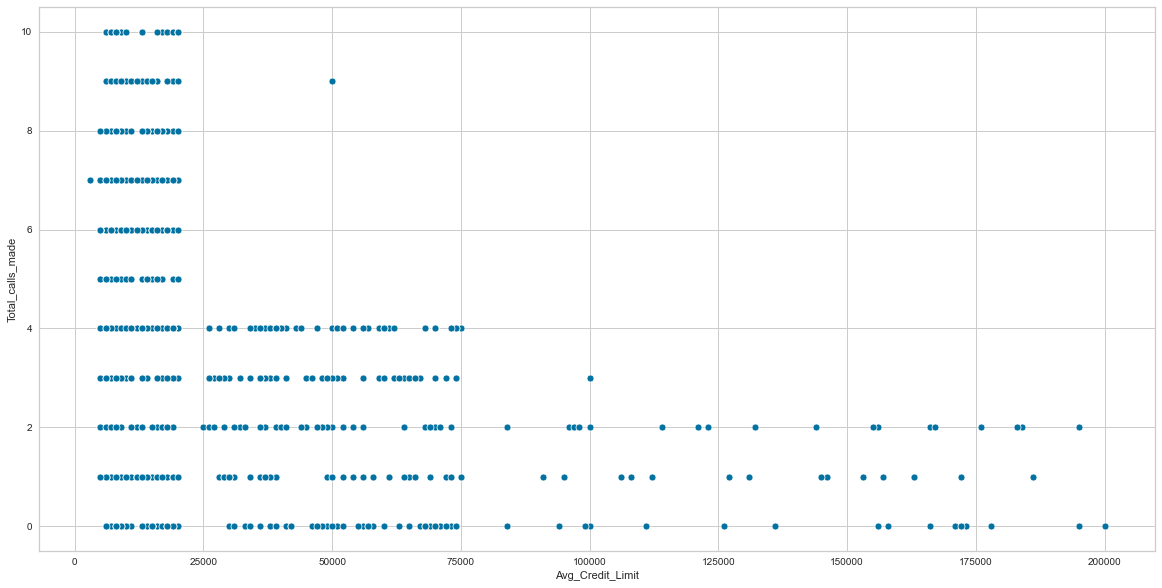

In [29]:
# ScatterPlot of Average Credit Limit and Total Number of Calls made to the bank
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_calls_made', data=data)

In [30]:
# Filter data to reveal outliers
actc = (data['Avg_Credit_Limit']>75000) & (data['Total_calls_made'] > 2) 
data.loc[(actc)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,100000,6,0,12,3


In [31]:
# Filter data to reveal outliers
actc = (data['Avg_Credit_Limit']>25000) & (data['Total_calls_made'] > 4) 
data.loc[(actc)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9


### Observation
- Customers who have an average credit limit more than 75,000 make between 0 and 2 calls to the bank.
- Customers who have an average credit limit between 25,000 and 75,000 make between 0 and 4 calls to the bank.
- Customers who have an average credit limit less than 25,000 make the most calls to the bank (Up to 10 calls made)
- Customers in rows 1 and 4 are outliers as they do not follow the pattern of similar datapoints. We will go ahead and drop these rows

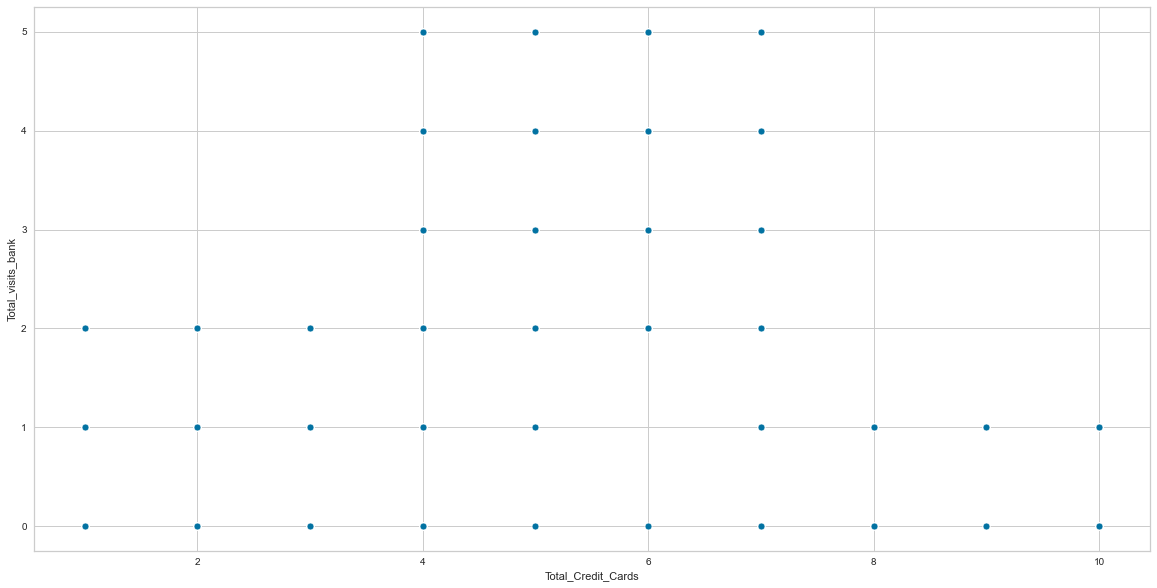

In [32]:
# ScatterPlot of Total Number of Credit cards owned and Total Number of Visits to the bank
plt.figure(figsize=(20,10))
sns.scatterplot(x='Total_Credit_Cards',y='Total_visits_bank', data=data)

### Observations
- Customers who have less than 4 credit cards visited bank less - 2 times or less.
- Customers who have more than 7 credit cards visited bank less - 1 time or less.
- Customers who have 4 to 7 credit cards visits banks more than others - up to 5 times.

### 1.7 Outlier Treatment

As previously mentioned we will go ahead and drop the identified outliers

In [33]:
# Drop Outliers
data.drop(data.index[[0,1,2,3,4,6,614]],inplace=True)

### 1.8  Exploratory Data Analysis (Multivariate Analysis)

###  HeatMap 

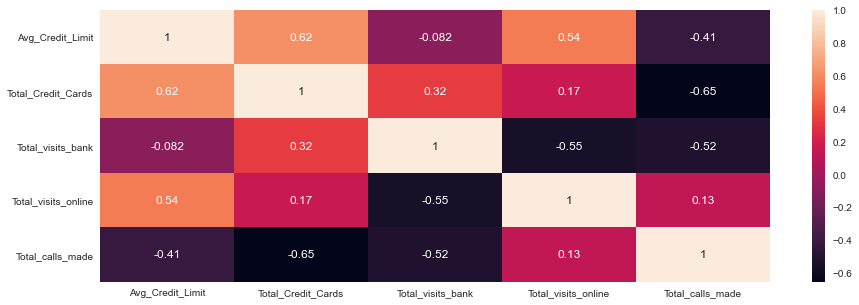

In [34]:
# Diaplay Heatmap of numerical variables
colss = ['Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
plt.figure(figsize=(15,5))
sns.heatmap(data[colss].corr(),annot=True)
plt.show()

### Pairplot

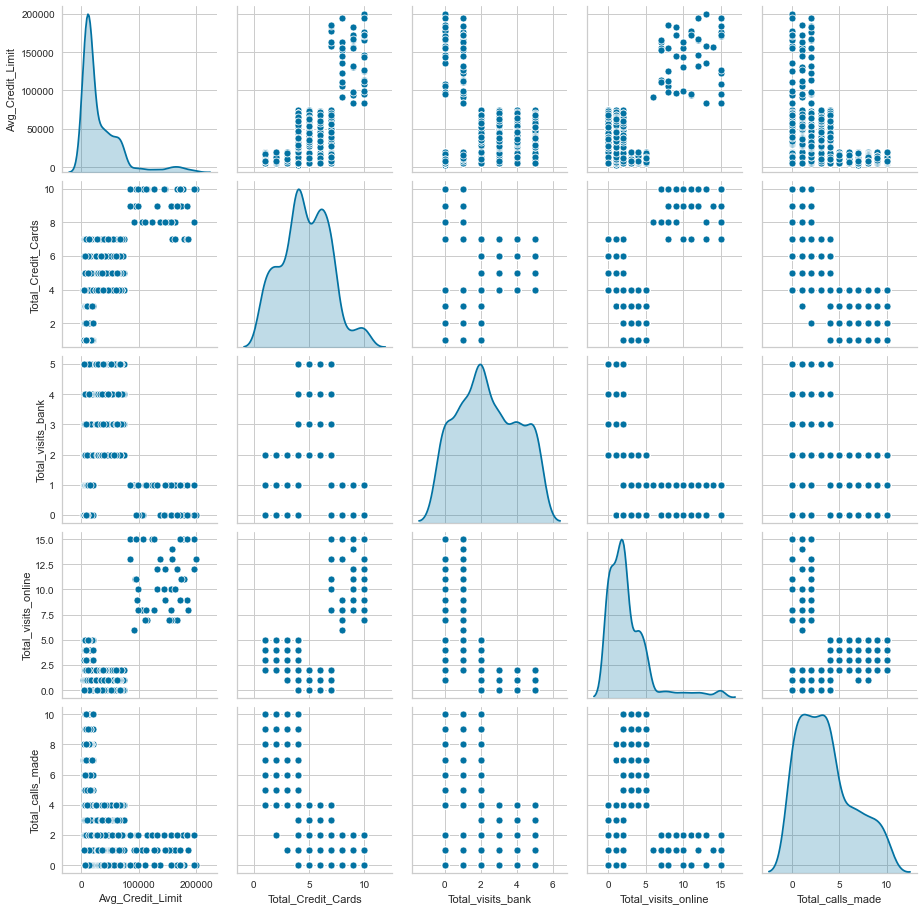

In [35]:
#Scatterplot and distribution of some key numerical variables
colss = data[['Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
sns.pairplot(data=colss,diag_kind="kde")

### Observations

- There are a few cases of multicollinearity which we would need to address. 


- There are strong positive correlations between Avg_Credit_Limit and both Total_Credit_Cards and Total_visits_online. This means that as Average credit limit increases, the total number of credit cards a customer holds and also the total number of visits customers make online tends to increase also. 


- There is also a strong negative correlation between total number of credit cards held and number of calls made to the bank. suggesting that the more cards a customer has, the less likely they are to call the bank. 


- We can also see from the data that customers who visit the bank are less likely to call or visit the bank online. Suggesting that these customers prefer the physical interface between themselves and the bank. This could be as a result of many things such as education level/lack of knowledge, income level etc The data however doesnt provide us with the necessary information to make any definitive conclusions on factors that influences customer behaviour.


- It is important to avoid multicollinearity because when variables used in clustering are collinear, some variables get a higher weight than others. If two variables are highly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. Our clusters would likely be skewed in the direction of that concept, which could be a problem if it’s not handled. To treat this problem, we would reduce our dimensions using PCA

### 1.9 Scale Data for K-Means Clustering

In [36]:
# Scaling the data set before clustering
df =data.copy()

#Initialize Standard Scaler
scaler=StandardScaler()

#Fit_transform data
scaled=scaler.fit_transform(df)   

#Creating a dataframe from the scaled data above
scaled_data=pd.DataFrame(scaled,columns=df.columns)

scaled_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.372218,-0.777539,-1.488797,-0.542591,1.533131
1,-0.507449,-0.777539,-1.488797,-0.542591,-0.907824
2,-0.777910,-1.238092,-1.488797,-0.193782,-0.559116
3,-0.832002,-0.316986,-1.488797,-0.542591,1.184423
4,-0.642679,-0.316986,-1.488797,0.852643,0.487007


### 2.0 Dimensionality Reduction using Principal Component Analysis (PCA)

#### Why PCA?
PCA has the ability to process our independent set of variables in such a manner where we end up with the set of variables which has more insightful information and very little noise. With less noise and reduced dimensions, the data set becomes extremely lightweight, can be visualized better. It can also be much more easily processed by our ML models with very little overfitting. 

In [37]:
#Instantiate PCA Model
pca = PCA()
#Fit Model
pca.fit(scaled_data)

#The attribute shows how much variance each of the three individual components has.
pca.explained_variance_ratio_

array([0.46052616, 0.3717102 , 0.0634863 , 0.05505362, 0.04922372])

Text(0, 0.5, 'Cumulative Explained Variance')

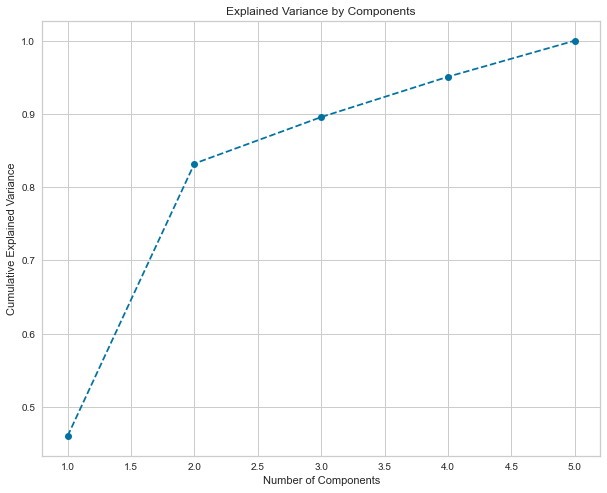

In [38]:
# Plot Explained Variance by Components
plt.figure(figsize = (10,8))
plt.plot(range(1,6),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [39]:
pca = PCA(.80,svd_solver ='full') # svd_solver -full helps to converge faster in case of very large data set
pca.fit(scaled_data)

PCA(n_components=0.8, svd_solver='full')

In [40]:
# Amount of variance explained by features
pca.explained_variance_

array([2.30618976, 1.86142359])

Text(0, 0.5, 'Cumulative Explained Variance')

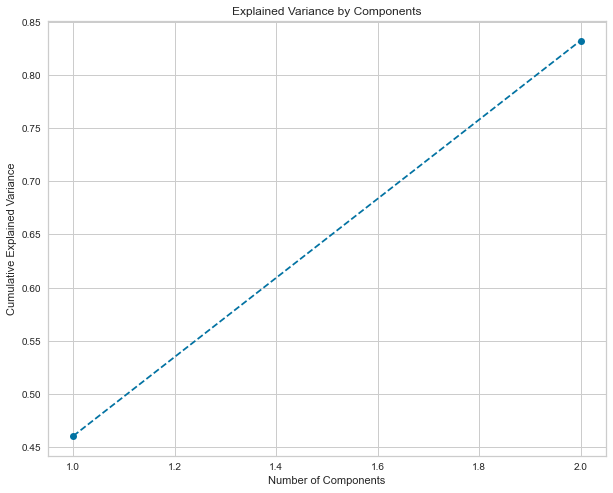

In [41]:
plt.figure(figsize = (10,8))
plt.plot(range(1,3),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

To get a 80% of explained variance, our number of components should be 2

In [42]:
# Transform data using PCA
data_pca_km = pca.transform(scaled_data)
data_pca_km = pd.DataFrame(data_pca_km)

### 2.1 K-Means Clustering 

### Selecting K with Elbow Method

Number of Clusters: 1 	Average Distortion: 1.730597146805392
Number of Clusters: 2 	Average Distortion: 1.0338471746711424
Number of Clusters: 3 	Average Distortion: 0.6680947926775566
Number of Clusters: 4 	Average Distortion: 0.5814123926753899
Number of Clusters: 5 	Average Distortion: 0.5274660448868684
Number of Clusters: 6 	Average Distortion: 0.47298789268557817
Number of Clusters: 7 	Average Distortion: 0.449684752776623
Number of Clusters: 8 	Average Distortion: 0.4196797212092889


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

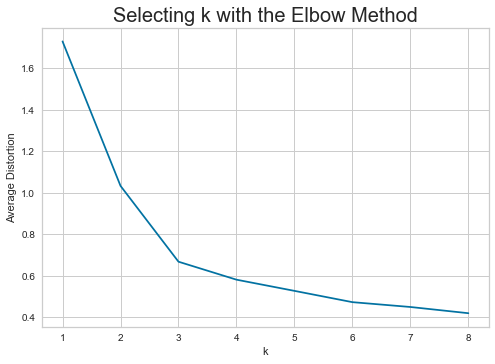

In [43]:
# Elbow method to select initial value of K
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_pca_km)
    prediction=model.predict(data_pca_km)
    distortion=sum(np.min(cdist(data_pca_km, model.cluster_centers_, 'euclidean'), axis=1)) / data_pca_km.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

### Observation
From the plot above, the ideal value for K seems to lie between 3 and 5. Lets plot the silhouette score to validate this further

### Silhouette Score

In [44]:
# Get Silhouette scores for clusters between 2 and 9
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((data_pca_km))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(data_pca_km, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5650013365434757)
For n_clusters = 3, silhouette score is 0.6878927113370655)
For n_clusters = 4, silhouette score is 0.47085465121485753)
For n_clusters = 5, silhouette score is 0.37840771973744697)
For n_clusters = 6, silhouette score is 0.39133479937039545)
For n_clusters = 7, silhouette score is 0.37245554830085903)
For n_clusters = 8, silhouette score is 0.3596814467261668)
For n_clusters = 9, silhouette score is 0.35102916716900356)


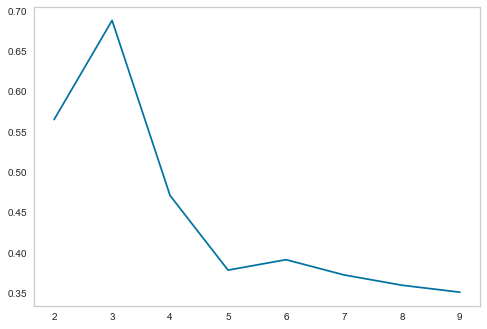

In [45]:
plt.plot(cluster_list,sil_score)
plt.grid()

### Observation

From this plot, we can see that the silhoutte score of 0.69 is closest to 1 meaning that the ideal number of clusters is 3. At this point, the datapoints within the clusters are closest together and also the clusters are farthest away from each other.

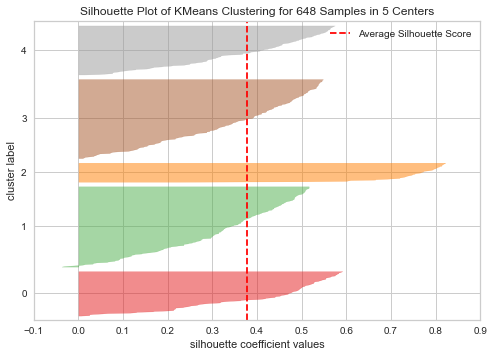

In [46]:
#Finding optimal no. of clusters with silhouette coefficients(K=5)
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(data_pca_km)    
visualizer.show()

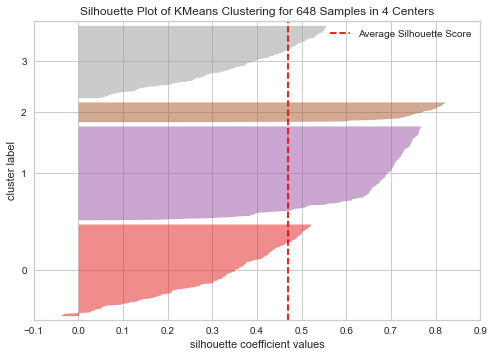

In [47]:
#Finding optimal no. of clusters with silhouette coefficients(K=4)
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(data_pca_km)    
visualizer.show()

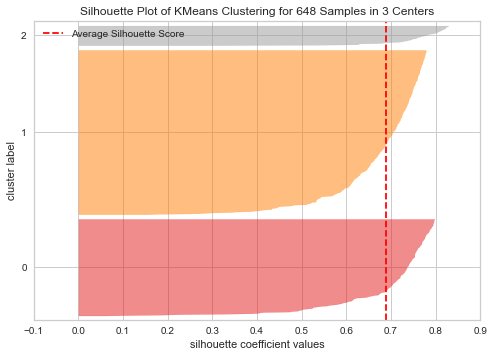

In [48]:
#Finding optimal no. of clusters with silhouette coefficients(K=3)
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(data_pca_km)    
visualizer.show()

### Observations

We can see that the average silhoutte coefficients is highest when K is 3. Also, our clusters perform better than the average. As a result, we would make use of 3 clusters.

In [49]:
# K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred= kmeans.fit_predict(data_pca_km)

### Plot Clusters and Centroids 

In [50]:
# Add clusters to original PCA and scaled datasets
df['K_means_segments'] = y_pred 
scaled_data['K_means_segments'] = y_pred
data_pca_km['K_means_segments'] = y_pred

In [51]:
# Assign names to columns
data_pca_km.columns = ['x','y','segments']
data_pca_km

,x,y,segments
0,-1.999435,0.627983,1
1,-0.695828,0.052707,1
2,-1.262924,0.226640,1
3,-1.750754,0.386279,1
4,-1.136045,1.251965,1
...,...,...,...
643,2.996910,2.826358,2
644,2.509931,3.509021,2
645,2.818190,3.135705,2
646,4.113010,4.811982,2


In [52]:
# Clusters centroids
kmeans.cluster_centers_

array([[ 0.68310965, -0.86163608],
       [-1.78728837,  0.6998086 ],
       [ 3.03623364,  3.70658161]])

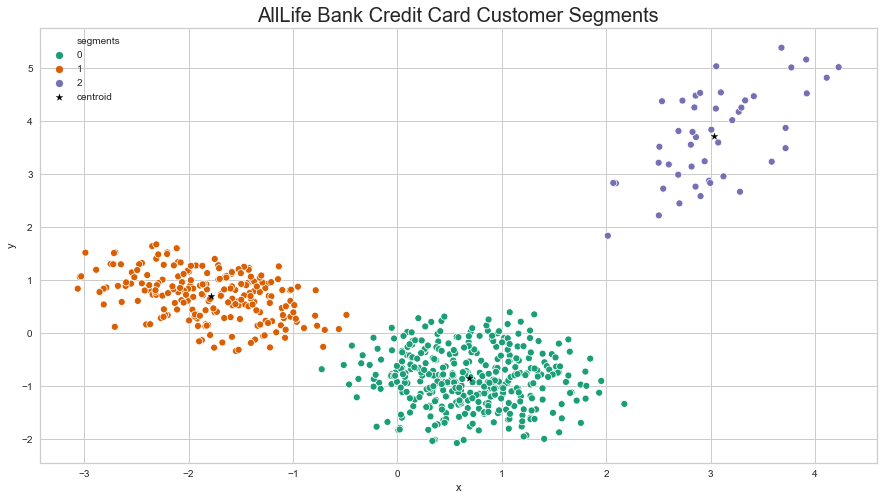

In [53]:
# Plot Clusters and Centroids
plt.figure(figsize=(15,8))
sns.scatterplot(
    x=data_pca_km.x,
    y=data_pca_km.y,
    hue=data_pca_km.segments,
    palette='Dark2'
)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('AllLife Bank Credit Card Customer Segments', fontsize=20)
plt.legend()

In [54]:
# Rename Cluster Labels
segments = {0:'Segment 1', 1:'Segment 2',2:'Segment 3'}
df['K_means_segments']=df['K_means_segments'].map(segments)
scaled_data['K_means_segments']=scaled_data['K_means_segments'].map(segments)

In [55]:
# Convert K_means_segments to categorical variable
df['K_means_segments'] = df['K_means_segments'].astype('category')
scaled_data['K_means_segments'] = scaled_data['K_means_segments'].astype('category')

In [56]:
# Count of customers by segment
df['K_means_segments'].value_counts(normalize=True)

Segment 1    0.584877
Segment 2    0.344136
Segment 3    0.070988
Name: K_means_segments, dtype: float64

### Observations
- 58.4% of customers fall under Segment 1
- 34.4% of customers are in Segment 2
- 7.1% of customers are in Segment 3

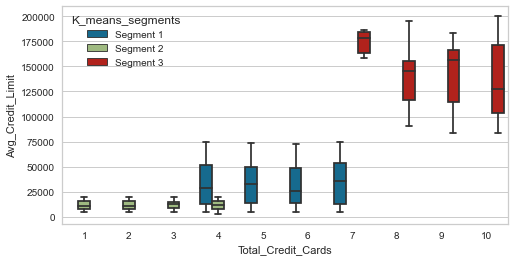

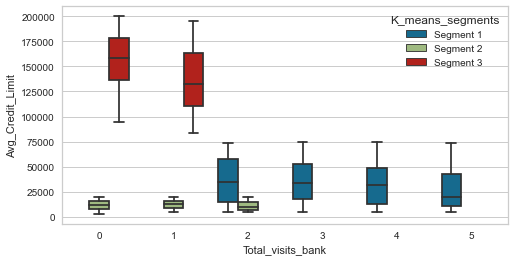

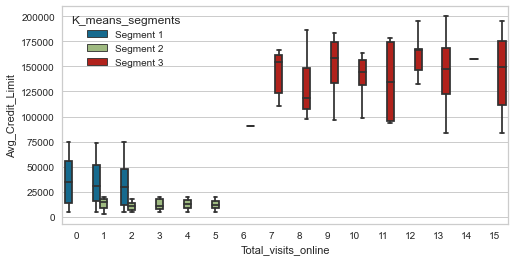

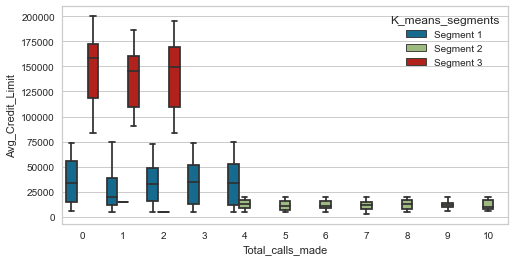

In [57]:
# Box plot to visualize relationship between segments and all features
for i in df.columns[(df.columns!='K_means_segments') & (df.columns!='Avg_Credit_Limit')]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[i],
                y=df['Avg_Credit_Limit'], 
                hue=df['K_means_segments'])
    plt.show()

In [58]:
# The average values for each feature in each cluster
cluster_profile = df.groupby('K_means_segments').mean()

In [59]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
Segment 1,33395.778364,5.511873,3.514512,0.970976,2.000000
Segment 2,12004.484305,2.408072,0.937220,3.524664,6.860987
Segment 3,142260.869565,8.956522,0.630435,10.913043,1.021739


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000164B7633DF0>,
      dtype=object)

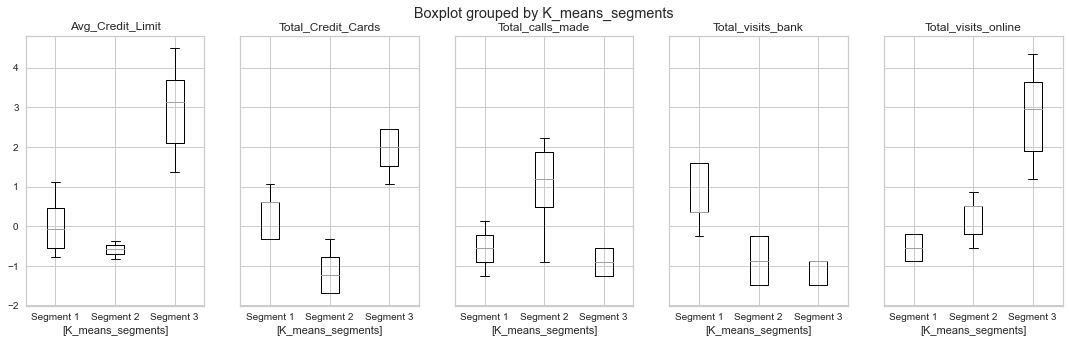

In [60]:
scaled_data.boxplot(by='K_means_segments',layout=(1,5),figsize=(18,5))

### Observations on K-Means Clusters

- Customers in Segment 3 are very distinct from customers in segments 1 and 2.
    - Customers who have an average credit limit of 75k and above are in segment 3.
    - Customers who have more than 7 credit cards are in segment 3.
    - Customers who have visited the bank online more than 6 times are in segment 3.
- Segment 2 customers have the least number of credit cards - 1-4 credit cards.
- Customers in Segment 2 make calls more than 4 times.
- Segment 1 customers visit the bank more than other segments - up to 5 times.
- Segment 1 customers do not visit the bank online as often as segments 2 and 3.

### 2.2 Scale Data for Hierarchical Clustering

In [61]:
# Scaling the data set before clustering
hc_df =data.copy()

#Initialize Standard Scaler
hc_scaler=StandardScaler()

#Fit_transform data
hc_scaled=hc_scaler.fit_transform(hc_df)   

#Creating a dataframe from the scaled data above
hc_scaled_data=pd.DataFrame(hc_scaled,columns=hc_df.columns)

hc_scaled_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.372218,-0.777539,-1.488797,-0.542591,1.533131
1,-0.507449,-0.777539,-1.488797,-0.542591,-0.907824
2,-0.777910,-1.238092,-1.488797,-0.193782,-0.559116
3,-0.832002,-0.316986,-1.488797,-0.542591,1.184423
4,-0.642679,-0.316986,-1.488797,0.852643,0.487007


### 2.3 Dimensionality Reduction (PCA) for Hierarchical Clustering

In [62]:
#Instantiate PCA Model
hc_pca = PCA()
#Fit Model
hc_pca.fit(hc_scaled_data)

#The attribute shows how much variance each of the three individual components has.
hc_pca.explained_variance_ratio_

array([0.46052616, 0.3717102 , 0.0634863 , 0.05505362, 0.04922372])

Text(0, 0.5, 'Cumulative Explained Variance')

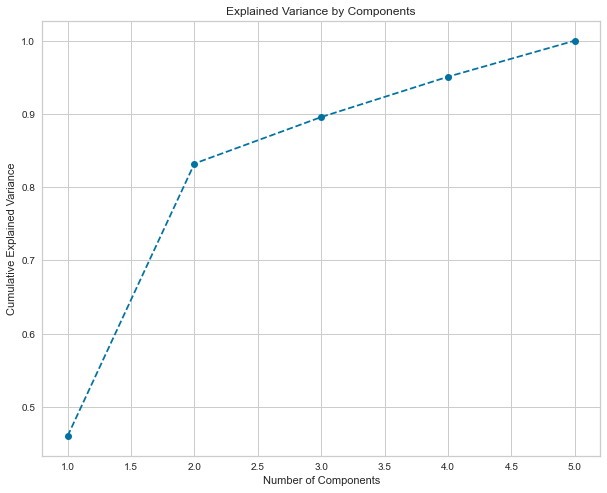

In [63]:
# Plot Explained Variance by Components
plt.figure(figsize = (10,8))
plt.plot(range(1,6),hc_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [64]:
hc_pca = PCA(.80,svd_solver ='full') # svd_solver -full helps to converge faster in case of very large data set
hc_pca.fit(hc_scaled_data)

PCA(n_components=0.8, svd_solver='full')

In [65]:
hc_pca.explained_variance_

array([2.30618976, 1.86142359])

Text(0, 0.5, 'Cumulative Explained Variance')

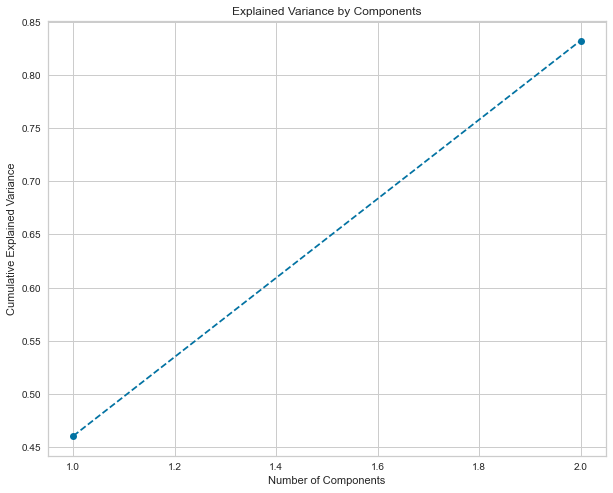

In [66]:
plt.figure(figsize = (10,8))
plt.plot(range(1,3),hc_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

To get a 80% of explained variance, our number of components should be 2

In [67]:
# Transfor Data using PCA
hc_data_pca = pca.transform(hc_scaled_data)
hc_data_pca = pd.DataFrame(hc_data_pca)

### 2.4 Hierarchical Clustering

To perform hierarchical clustering, we will plot a dendrogram and then calculate the cophenet index which is a measure of the correlation between the distance of points in feature space and distance on dendrogram. When the cophenet index is close to 1, that means we have good clustering.

,linkage,cophenetic_coeff
0,single,0.797846
1,average,0.916136
2,complete,0.896787
3,centroid,0.915014
4,ward,0.782569
5,weighted,0.906277


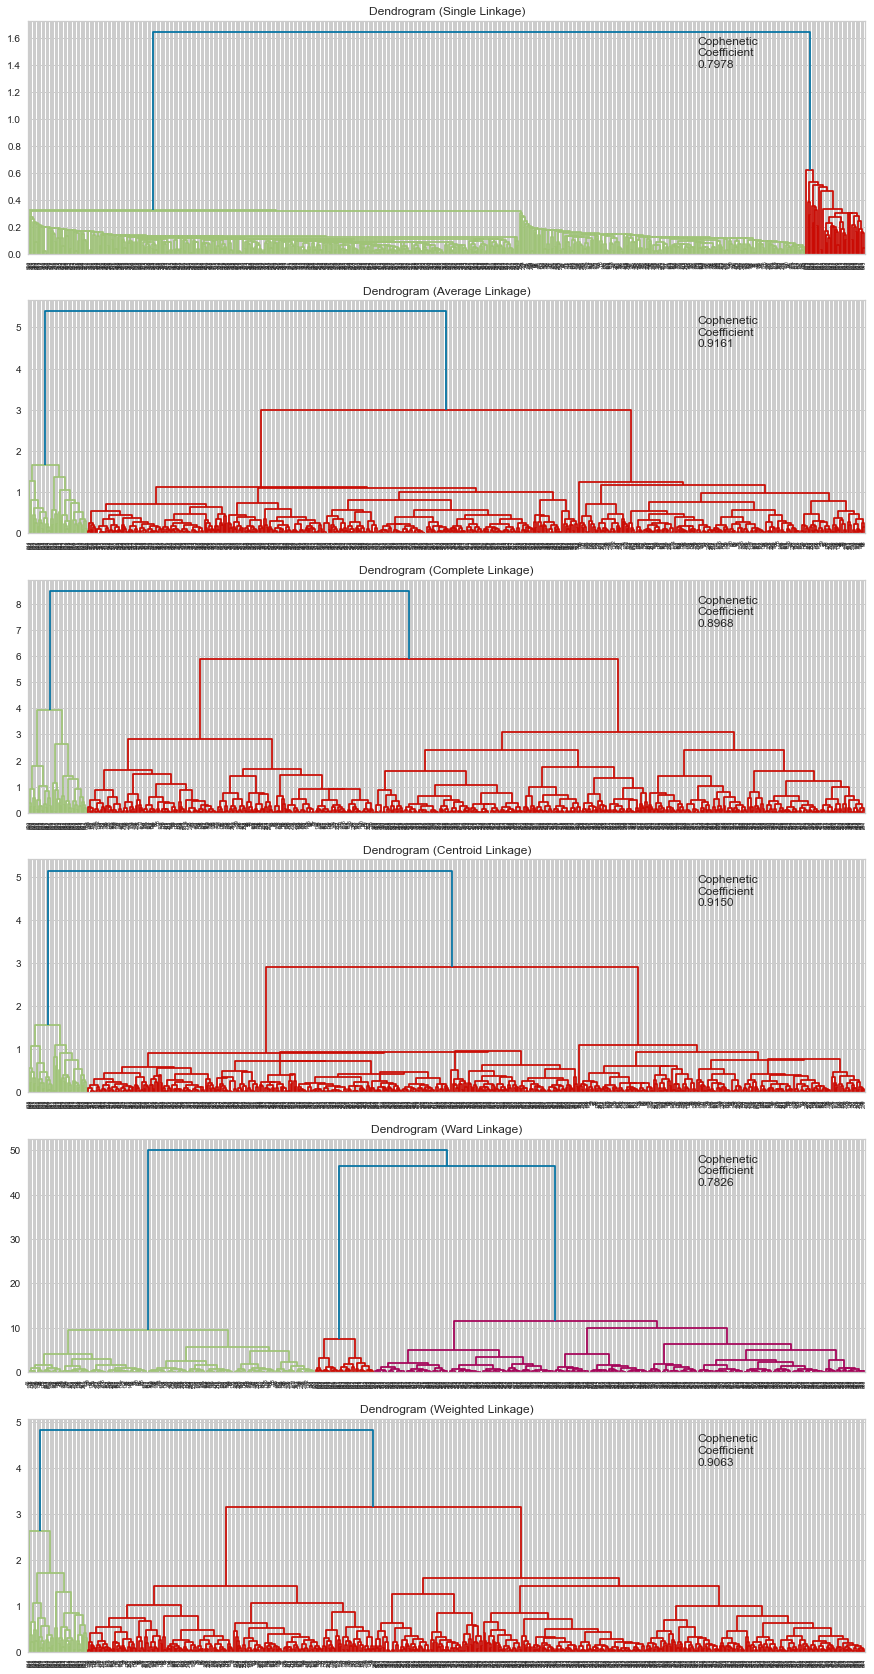

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [68]:
# List of all linkage methods to check
methods = ['single','average', 'complete','centroid','ward','weighted']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

result = []
for i, method in enumerate(methods):
    # Get linkage, plot dendrogram, calculate cophenetic coefficient
    Z = linkage(hc_data_pca, metric='euclidean', method=method)
    coph_corr, coph_dists = cophenet(Z , pdist(hc_data_pca))
    
    plt.figure(figsize=(20, 10))
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.4f}',(0.80, 0.80), xycoords='axes fraction')
    
    #Store result in DataFrame for comparison
    result.append((method,coph_corr))
    
    cols = ['linkage','cophenetic_coeff']
    result_df = pd.DataFrame(result, columns=cols)
    
result_df

### Observation

- Our Dendogram with average linkage produced the highest cophenet score of 0.9161. From the Dendogram plot, we can also see that there are 3 distinct clusters within our dataset. As such, we will go ahead and train our model with 3 clusters using the average linkage and euclidean distance.

In [69]:
# Fit AgglomerativeClustering Model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(hc_data_pca)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [70]:
# Calculate Cophnet coefficient
Z_ave = linkage(hc_data_pca, metric='euclidean', method='average')
average_coph_corr, coph_dists = cophenet(Z_ave , pdist(hc_data_pca))

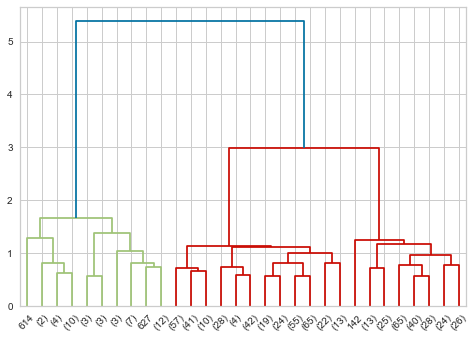

In [71]:
# Validate how many clusters are in dendogram
dendrogram(Z_ave, truncate_mode='lastp')
plt.show()

### Plot Clusters 

In [72]:
# Add clusters to original PCA and scaled datasets
hc_df['Hierarchical_segments'] = model.labels_ 
hc_scaled_data['Hierarchical_segments'] = model.labels_
hc_data_pca['Hierarchical_segments'] = model.labels_

In [73]:
# Assign names to columns
hc_data_pca.columns = ['x','y','segments']
hc_data_pca

,x,y,segments
0,-1.999435,0.627983,1
1,-0.695828,0.052707,1
2,-1.262924,0.226640,1
3,-1.750754,0.386279,1
4,-1.136045,1.251965,1
...,...,...,...
643,2.996910,2.826358,0
644,2.509931,3.509021,0
645,2.818190,3.135705,0
646,4.113010,4.811982,0


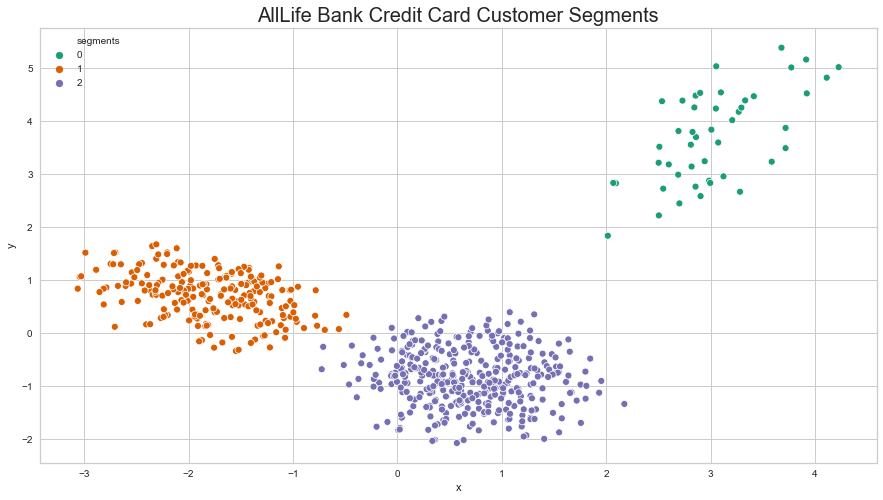

In [74]:
# Plot Clusters
plt.figure(figsize=(15,8))
sns.scatterplot(
    x=hc_data_pca.x,
    y=hc_data_pca.y,
    hue=hc_data_pca.segments,
    palette='Dark2'
)
plt.title('AllLife Bank Credit Card Customer Segments', fontsize=20)
plt.legend()

In [75]:
# Rename Cluster Labels
segments = {0:'Segment 3', 1:'Segment 2',2:'Segment 1'}
hc_df['Hierarchical_segments']=hc_df['Hierarchical_segments'].map(segments)
hc_scaled_data['Hierarchical_segments']=hc_scaled_data['Hierarchical_segments'].map(segments)

In [76]:
# Convert K_means_segments to categorical variable
hc_df['Hierarchical_segments'] = hc_df['Hierarchical_segments'].astype('category')
hc_scaled_data['Hierarchical_segments'] = hc_scaled_data['Hierarchical_segments'].astype('category')

In [77]:
# Count of customers by segment
hc_df['Hierarchical_segments'].value_counts(normalize=True)

Segment 1    0.586420
Segment 2    0.342593
Segment 3    0.070988
Name: Hierarchical_segments, dtype: float64

### Observations
- 58.6% of customers fall under Segment 1
- 34.3% of customers are in Segment 2
- 7.1% of customers are in Segment 3

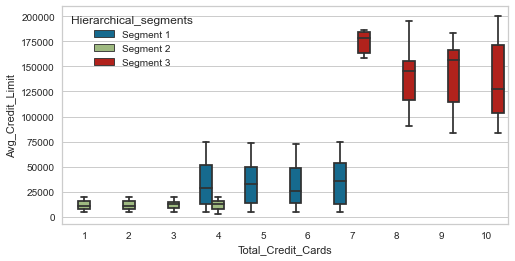

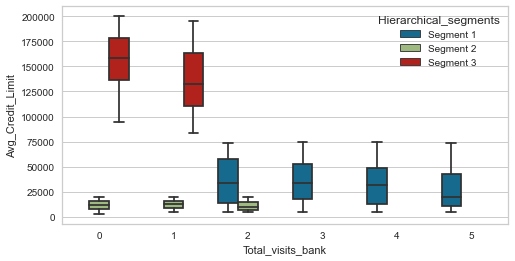

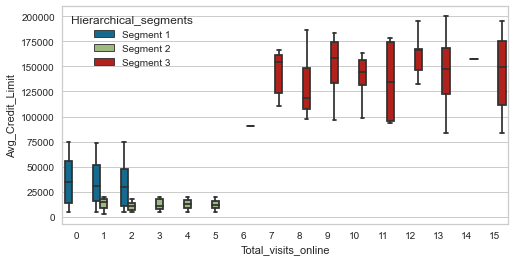

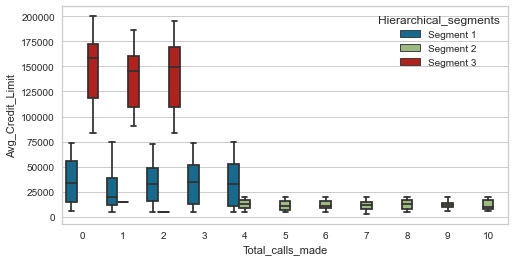

In [78]:
# Box plot to visualize relationship between segments and all features
for i in hc_df.columns[(hc_df.columns!='Hierarchical_segments') & (hc_df.columns!='Avg_Credit_Limit')]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=hc_df[i],
                y=hc_df['Avg_Credit_Limit'], 
                hue=hc_df['Hierarchical_segments'])
    plt.show()

In [79]:
# The average values for each feature in each cluster
hc_cluster_profile = hc_df.groupby('Hierarchical_segments').mean()

In [80]:
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Hierarchical_segments,,,,,
Segment 1,33326.315789,5.507895,3.510526,0.973684,2.005263
Segment 2,12027.027027,2.400901,0.932432,3.531532,6.873874
Segment 3,142260.869565,8.956522,0.630435,10.913043,1.021739


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000164BE843910>,
      dtype=object)

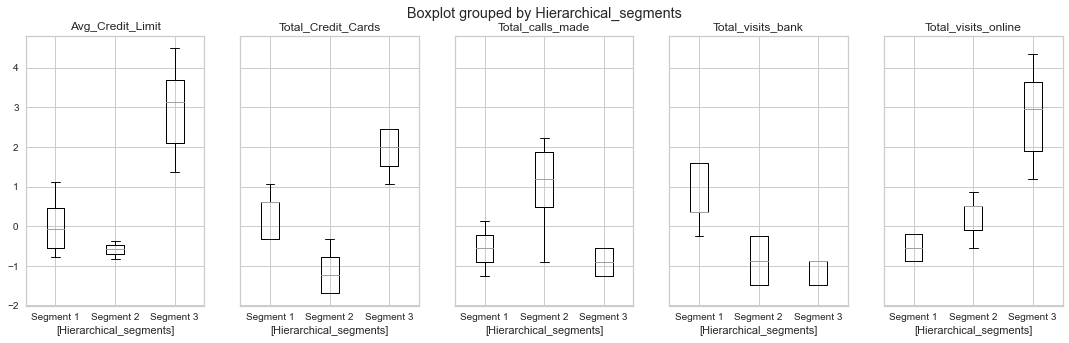

In [81]:
hc_scaled_data.boxplot(by='Hierarchical_segments',layout=(1,5),figsize=(18,5))

### Observations on Hierarchical Clusters

- Customers in Segment 3 are also very distinct from customers in segments 1 and 2.
    - Customers who have an average credit limit of 75k and above are in segment 3.
    - Customers who have more than 7 credit cards are in segment 3.
    - Customers who have visited the bank online more than 6 times are in segment 3.
    
    
- Segment 2 customers have the least number of credit cards - 1-4 credit cards.
- Customers in Segment 2 make calls more than 4 times.


- Segment 1 customers visit the bank more than other segments - up to 5 times.
- Segment 1 customers do not visit the bank online as often as segments 2 and 3.

### Differences between K-Means and Hierarchical Clusters

- There isn't much of a difference between the clusters formed using K-Means and the clusters formed using Hierarchical clustering. The major difference is in the classification of cluster labels. Hierarchical clustering has different labels from K-means. Label 0 in k-means clustering is segment 1 while it is segment 3 in hierarchical clustering. Label 2 in k-means clustering is segment 3 while it is segment 1 in hierarchical clustering. Label 1 remains the same in both k-means and hierarchical clustering.


- Our K-Means clustering model(379) predicted 1 less customer in segment 1 than Hierarchical clustering(380 customers)
- Our K-Means clustering model(223) predicted 1 more customer in segment 2 than Hierarchical clustering(222 customers)
- K-Means and Hierarchical clustering predicted the same number of customers in segment 3

### Recommendations and Conclusions

A key insight from our clustering efforts is that our model segmented customers according to their preferred touchpoints. 

Customers in ***segment 1*** prefer to handle their banking transactions in person that is, they are primarily ***walk-in customers***. They very rarely make use of the banks online platforms in carrying out their banking transactions. There is an opportunity for the bank to cross-sell and up-sell other banking services to these customers as they will have direct contact with them. This is important because by up-selling and cross-selling, the bank can increase the customer lifetime value of these customers without incurring much additional cost.   

Customers in ***segment 2*** prefer to contact the bank via the phone. They have the least number of credit cards amongst the other categories of customers. These customers are not opposed to interacting with the bank online however, they still want to have that personal touch in their experiences with the bank.  A strategy the bank can use to target these customers is text message (SMS) marketing. A benefit of this is that it is fast meaning that it can reach a large number of customers very quickly and at minimal cost. Another strategy the bank could use in providing quick support to these customers is by making use of interactive voice response (IVRs) solutions. This allows the bank to cut support costs by using IVRs to handle easy and repetitive issues customers may have while utilizing physical resources in a more efficient manner. 

Customers in ***segment 3*** prefer to interact with the bank online. These customers are given a large credit limit and they also hold more than 7 credit cards. This suggests that they are heavy users of the banks credit facilities. They are most likely affluent given that they have a large credit limits. This means that the bank believes they would not default in payment. Their tech savviness means that the marketing team can reach them via various online channels like e-mail, social media, mobile apps etc. This is a key segment for the bank as they represent a large proportion of their income. A strategy the bank could use to increase the lifetime value of these customers is to introduce higher grades of cards which could be available to customers who have reached a certain credit limit or according to usage. Holding such cards would come with certain perks and benefits which would encourage heavy users like customers within this segment to subscribe.